In [1]:
import numpy as np
import torch

In [4]:
thetas_posterior_a = np.load('thetas_posterior_2a.npy')

In [5]:
thetas_posterior_b = np.load('thetas_posterior_2c.npy')

(array([   712.,  12339.,  68426., 175166., 257597., 253893., 162448.,
         59644.,   9319.,    456.]),
 array([-1.670463  , -1.332814  , -0.995165  , -0.65751606, -0.31986707,
         0.01778191,  0.3554309 ,  0.6930799 ,  1.0307288 ,  1.3683778 ,
         1.7060268 ], dtype=float32),
 <a list of 10 Patch objects>)

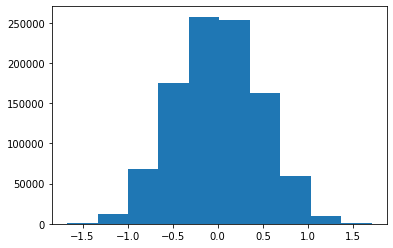

In [6]:
import matplotlib.pyplot as plt
#thetas_posterior_a = thetas_posterior_a[:10000]
plt.hist(thetas_posterior_a)

(array([  4431., 114904., 217179., 113628.,  58069.,  63048., 133716.,
        216153.,  77523.,   1349.]),
 array([-2.4808364 , -1.9745905 , -1.4683447 , -0.96209884, -0.455853  ,
         0.05039287,  0.5566387 ,  1.0628846 ,  1.5691304 ,  2.0753763 ,
         2.5816221 ], dtype=float32),
 <a list of 10 Patch objects>)

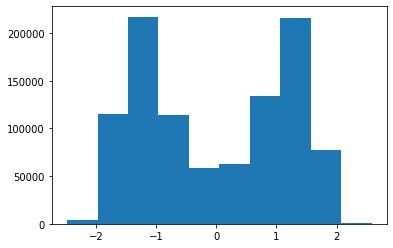

In [7]:
import matplotlib.pyplot as plt
#thetas_posterior_b = thetas_posterior_b[:10000]
plt.hist(thetas_posterior_b)

In [8]:
observations = np.load("obs2c.npy")
observations_tensor = torch.Tensor(observations)

In [9]:
from torch.distributions.normal import Normal

def log_likelihood(mean, observations, sigma=1):
    return Normal(mean, sigma).log_prob(observations).sum(dim=1)

In [10]:
thetas_all = np.vstack([thetas_posterior_a, thetas_posterior_b])

In [11]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [14]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [15]:
lls_a = log_likelihood(-thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=1)
lls_a = lls_a.cpu().numpy()

In [17]:
lls_b = log_likelihood(thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=1)
lls_b = lls_b.cpu().numpy()

In [19]:
N = thetas_posterior_a.shape[0]
def nll(logB):
    part1 = np.log(1.+np.exp(lls_b[:N] - lls_a[:N] + logB)).mean()
    part2 = np.log(1.+np.exp(lls_a[N:] - lls_b[N:] - logB)).mean()
    return part1 + part2

In [25]:
from scipy import optimize
np.seterr('raise')
result = optimize.minimize_scalar(nll)

In [26]:
result.success

True

In [27]:
result.x

-2.066328183888527